All Required Imports here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [3]:
# Data source - https://www.kaggle.com/rtatman/speech-accent-archive
# http://accent.gmu.edu/

In [4]:
info= pd.read_csv('../Data/archive-2/speakers_all.csv')

In [5]:
info.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


In [6]:
info.drop(columns=['Unnamed: 9','Unnamed: 10','Unnamed: 11'], inplace=True)

In [7]:
info.isnull().sum()

age                0
age_onset          0
birthplace         4
filename           0
native_language    0
sex                0
speakerid          0
country            5
file_missing?      0
dtype: int64

In [8]:
info[info['birthplace'].isnull()]

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
1970,0.0,0.0,NaN,synthesized1,synthesized,male,355,NaN,False
1971,0.0,0.0,NaN,synthesized2,synthesized,female,356,NaN,False
1972,0.0,0.0,NaN,synthesized3,synthesized,female,357,NaN,False
1973,0.0,0.0,NaN,synthesized4,synthesized,male,358,NaN,False


In [9]:
info[info['country'].isnull()]

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
1372,25.0,21.0,"vientiane, laos,",lao2,lao,female,249,NaN,False
1970,0.0,0.0,NaN,synthesized1,synthesized,male,355,NaN,False
1971,0.0,0.0,NaN,synthesized2,synthesized,female,356,NaN,False
1972,0.0,0.0,NaN,synthesized3,synthesized,female,357,NaN,False
1973,0.0,0.0,NaN,synthesized4,synthesized,male,358,NaN,False


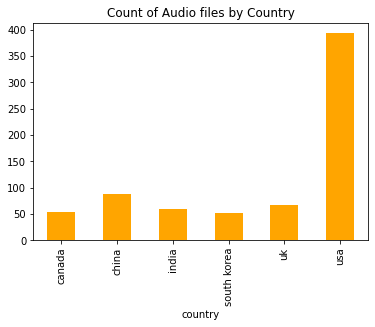

In [41]:
df1 = info[info['country'].map(info['country'].value_counts()) > 50]
df1.groupby('country')['filename'].count().plot(kind='bar', color='orange', title='Count of Audio files by Country');

# We will be using audio files from speakers from USA , China , India 

In [44]:
new_df = info[(info['country']=='usa') | (info['country']=='china') | (info['country']=='india')]

In [45]:
new_df.shape

(540, 9)

In [46]:
new_df.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
9,73.0,5.0,"pepeekeo, hawai'i, usa",hawai'i,hawai'i,male,1675,usa,True
10,69.0,4.0,"pa'ia, hawai'i, usa",hawai'i,hawai'i,female,1676,usa,True
20,25.0,5.0,"jammu, kashmir, india",poonchi1,poonchi,male,425,india,True
104,19.0,9.0,"shady grove, maryland, usa",arabic38,arabic,female,1394,usa,False
112,32.0,12.0,"fort collins, colorado, usa",arabic45,arabic,female,1456,usa,False


In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 9 to 2170
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              540 non-null    float64
 1   age_onset        540 non-null    float64
 2   birthplace       540 non-null    object 
 3   filename         540 non-null    object 
 4   native_language  540 non-null    object 
 5   sex              540 non-null    object 
 6   speakerid        540 non-null    int64  
 7   country          540 non-null    object 
 8   file_missing?    540 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 38.5+ KB


In [48]:
new_df['file_missing?'].value_counts()

False    537
True       3
Name: file_missing?, dtype: int64

In [49]:
new_df=new_df[new_df['file_missing?']==False]

In [50]:
new_df.shape

(537, 9)

In [51]:
#Read from other files created and create and convert into single dataframe to concatenate all
df1 = pd.read_csv('../Data/all_speakers_china1.csv')
df2 = pd.read_csv('../Data/all_speakers_china2.csv')
df3 = pd.read_csv('../Data/all_speakers_india1.csv')
df4 = pd.read_csv('../Data/all_speakers_india2.csv')
df5 = pd.read_csv('../Data/all_speakers_india3.csv')
df6 = pd.read_csv('../Data/all_speakers_india4.csv')
df7 = pd.read_csv('../Data/all_speakers_india5.csv')
df8 = pd.read_csv('../Data/all_speakers_india6.csv')
df9 = pd.read_csv('../Data/all_speakers_india7.csv')
df10 = pd.read_csv('../Data/all_speakers_india8.csv')
df11 = pd.read_csv('../Data/all_speakers_english1.csv')

In [52]:
df1.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
0,22,12,"hong kong, china (map)",cantonese1,cantone,female,45,china,False
1,20,13,"hong kong, china (map)",cantonese2,cantone,male,46,china,False
2,22,6,"hong kong, china (map)",cantonese3,cantone,male,47,china,False
3,29,13,"fuzhou, fujian, china (map)",cantonese4,cantone,female,48,china,False
4,18,14,"hong kong, china (map)",cantonese5,cantone,male,49,china,False


In [53]:
new_df=pd.concat([new_df, df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11],axis=0)
#new_df=pd.concat([new_df, df1],axis=0)

In [54]:
new_df.shape

(1659, 9)

In [55]:
new_df.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
104,19,9.0,"shady grove, maryland, usa",arabic38,arabic,female,1394,usa,False
112,32,12.0,"fort collins, colorado, usa",arabic45,arabic,female,1456,usa,False
148,19,3.0,"washington, district of columbia, usa",arabic78,arabic,female,1897,usa,False
187,43,40.0,"jianchuan, yunnan, china",bai1,bai,female,28,china,False
205,34,3.5,"durgapur, west bengal, india",bengali11,bengali,male,1018,india,False


In [56]:
#Remove duplicatefiles

In [57]:
new_df[new_df['filename'].duplicated()==True]

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
0,22,12.0,"hong kong, china (map)",cantonese1,cantone,female,45,china,False
1,20,13.0,"hong kong, china (map)",cantonese2,cantone,male,46,china,False
2,22,6.0,"hong kong, china (map)",cantonese3,cantone,male,47,china,False
3,29,13.0,"fuzhou, fujian, china (map)",cantonese4,cantone,female,48,china,False
4,18,14.0,"hong kong, china (map)",cantonese5,cantone,male,49,china,False
...,...,...,...,...,...,...,...,...,...
571,51,0.0,"fort worth, texas, usa (map)",english572,english,male,2121,"usa, uk",False
572,46,0.0,"painesville, ohio, usa (map)",english573,english,male,2124,usa,False
574,24,0.0,"great falls, virginia, usa (map)",english575,english,male,2165,usa,False
575,63,0.0,"washington, dc, usa (map)",english576,english,female,2167,usa,False


In [58]:
new_df.drop_duplicates(['filename'],keep='first',inplace=True)

In [59]:
new_df.shape

(1003, 9)

In [60]:
new_df[((new_df['native_language']!='english') & (new_df['country']=='usa'))]

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
104,19,9.0,"shady grove, maryland, usa",arabic38,arabic,female,1394,usa,False
112,32,12.0,"fort collins, colorado, usa",arabic45,arabic,female,1456,usa,False
148,19,3.0,"washington, district of columbia, usa",arabic78,arabic,female,1897,usa,False
958,52,6.0,"bethesda, maryland, usa",farsi14,farsi,female,1572,usa,False
999,22,6.0,"washington, dc, usa",french18,french,male,741,usa,False
1110,24,4.0,"bethlehem, pennsylvania, usa",greek12,greek,male,1712,usa,False
1112,22,3.0,"lancaster, pennsylvania, usa",greek14,greek,female,1816,usa,False
1283,19,16.0,"new orleans, louisiana, usa",kikongo1,kikongo,male,464,usa,False
1336,26,3.0,"bayside, new york, usa",korean42,korean,male,1950,usa,False
1478,23,7.0,"superior, colorado, usa",mandarin58,mandarin,male,2000,usa,False


In [61]:
#new_df=new_df[((new_df['native_language']=='english') & (new_df['country']=='usa')) | (new_df['country']=='china') | (new_df['country']=='india')]
new_df.shape

(1003, 9)

In [62]:
new_df.to_csv('../Data/File_for_modeling.csv',index=False)

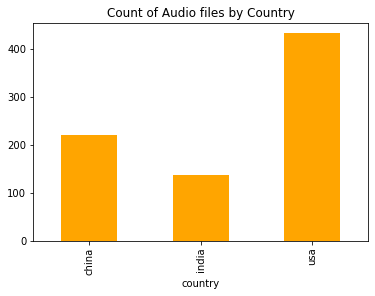

In [64]:
df2=new_df[new_df['country'].map(new_df['country'].value_counts()) > 50]
df2.groupby('country')['filename'].count().plot(kind='bar', color='orange', title='Count of Audio files by Country');